Importing Dataset

In [2]:
import pandas as pd

dataset = pd.read_csv("IMDB Dataset.csv")

# Display the first few rows of the dataset
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Cleaning Text

In [3]:
import re
import nltk
from nltk.corpus import stopwords

# Download the stopwords from NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))



def clean_text(text):
    # 1. Remove HTML tags
    text_cleaned = re.sub(r'<.*?>', '', text)
    # 2. Remove special characters and numbers
    text_cleaned = re.sub(r'[^a-zA-Z\s]', '', text_cleaned)
    # 3. Convert to lowercase
    text_cleaned = text_cleaned.lower()
    # 4. Remove extra whitespace
    text_cleaned = ' '.join(text_cleaned.split())
    # 5. Remove stop words
    text_cleaned = ' '.join(word for word in text_cleaned.split() if word not in stop_words)

    return text_cleaned


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Creating the cleaned column into the dataset

In [4]:
dataset['review_cleaned'] = dataset['review'].apply(clean_text)
# Display the first few rows of the cleaned dataset
dataset.head()

,review,sentiment,review_cleaned
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode yo...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


Vectorizing the text

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create a TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
# Fit and transform the cleaned reviews
X = vectorizer.fit_transform(dataset['review_cleaned'])
y = dataset['sentiment']




Separating the Dataset into Training and Testing Sets

In [6]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

Training the model with Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression model
LR = LogisticRegression()
# Train the model
LR.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Testing if LinearSVC has a Better Perfomance

In [8]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
# Create a Linear Support Vector Classifier model
SVC = LinearSVC()
# Train the model
SVC.fit(X_train, y_train)

# 3. make predictions
y_pred_svc = SVC.predict(X_test)

# 4. Avaliate the model
print("--- Result of the SVM Model (LinearSVC) ---")
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Accuracy: {accuracy_svc:.2%}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))

--- Result of the SVM Model (LinearSVC) ---
Accuracy: 88.46%

Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.88      0.88      6157
    positive       0.88      0.89      0.89      6343

    accuracy                           0.88     12500
   macro avg       0.88      0.88      0.88     12500
weighted avg       0.88      0.88      0.88     12500



Testing if the Naive Bayes has a better perfomance

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
# Create a Multinomial Naive Bayes model
NB = MultinomialNB()
# Train the model
NB.fit(X_train, y_train)

# 3. make predictions
y_pred_nb = NB.predict(X_test)

# 4. avaliate the model
print("--- Result of the Naive Bayes model (MultinomialNB) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.2%}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

--- Result of the Naive Bayes model (MultinomialNB) ---
Accuracy: 85.73%

Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.85      0.85      6157
    positive       0.85      0.87      0.86      6343

    accuracy                           0.86     12500
   macro avg       0.86      0.86      0.86     12500
weighted avg       0.86      0.86      0.86     12500



Predicting a Result

In [10]:
y_pred = LR.predict(X_test)

Showing the Results

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      6157
    positive       0.88      0.90      0.89      6343

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500

Confusion Matrix:


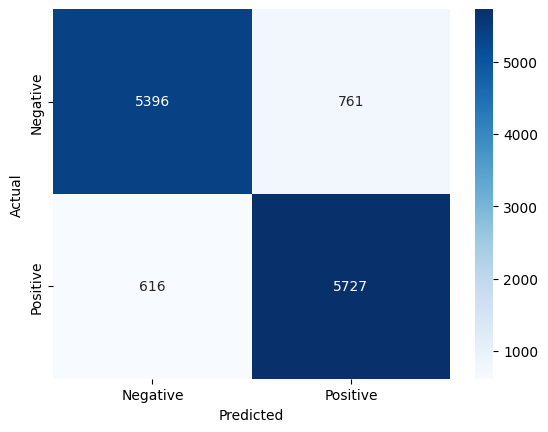

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Print confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
